In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier

In [3]:
dataset=pd.read_csv('parkinsons.data')
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
dataset.shape

(195, 24)

In [5]:
dataset.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
dataset['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

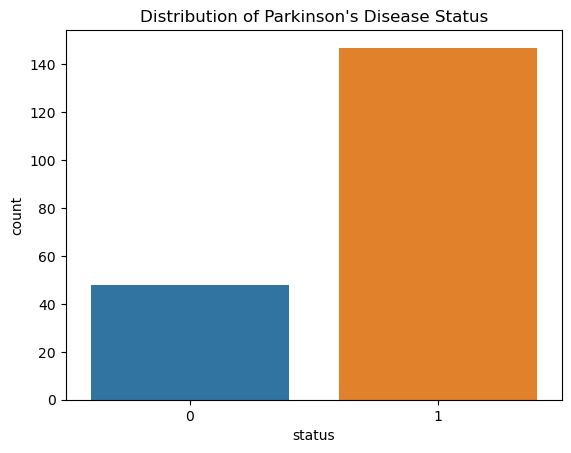

In [11]:
# Distribution of the target variable 'status'
sns.countplot(x='status', data=dataset)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.show()

# splitting the dataset

In [12]:
X = dataset.drop(['status','name'],axis=1)
Y = dataset['status']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

# Standarization

In [13]:
ss=StandardScaler()

In [14]:
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

# Model Training

In [15]:
models = {
    "lg": LogisticRegression(),
    "knc": KNeighborsClassifier(),
    "svc": SVC(),
    "gnb": GaussianNB(),
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    print(f"{name} with accuracy :",accuracy_score(y_test,y_predict))
    

lg with accuracy : 0.8205128205128205
knc with accuracy : 0.7692307692307693
svc with accuracy : 0.8974358974358975
gnb with accuracy : 0.6153846153846154
dtc with accuracy : 0.7435897435897436
rfc with accuracy : 0.8461538461538461


In [16]:
svc = SVC()
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)
accuracy_score(y_test,y_predict)

0.8974358974358975

# Using Ensamble Method 

In [17]:
models = {
    "lg": LogisticRegression(),
    "knc": KNeighborsClassifier(),
    "svc": SVC(probability=True),
    "gnb": GaussianNB(),
    "dtc": DecisionTreeClassifier(),
    "rfc": RandomForestClassifier(),
}

# Train and evaluate each individual model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"{name} with accuracy: {accuracy_score(y_test, y_predict):.2f}")

# Using Voting Classifier (Ensemble)
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='soft' 
)

# Train and evaluate the VotingClassifier
voting_clf.fit(X_train, y_train)
voting_predict = voting_clf.predict(X_test)

print(f"VotingClassifier with accuracy: {accuracy_score(y_test, voting_predict):.2f}")

# Using Bagging with RandomForestClassifie
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50)
bagging_clf.fit(X_train, y_train)
bagging_predict = bagging_clf.predict(X_test)
print(f"BaggingClassifier with accuracy: {accuracy_score(y_test, bagging_predict):.2f}")

# Using AdaBoost with DecisionTreeClassifier
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
adaboost_clf.fit(X_train, y_train)
adaboost_predict = adaboost_clf.predict(X_test)
print(f"AdaBoostClassifier with accuracy: {accuracy_score(y_test, adaboost_predict):.2f}")

lg with accuracy: 0.82
knc with accuracy: 0.77
svc with accuracy: 0.90
gnb with accuracy: 0.62
dtc with accuracy: 0.74
rfc with accuracy: 0.87
VotingClassifier with accuracy: 0.74
BaggingClassifier with accuracy: 0.85
AdaBoostClassifier with accuracy: 0.74


# Hybrid Model (Average Prediction)

In [18]:

def hybrid_predict(models, X):
    predictions = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X)
    return (np.mean(predictions, axis=1) > 0.5).astype(int)

hybrid_models = [RandomForestClassifier(), SVC(probability=True)]
for model in hybrid_models:
    model.fit(X_train, y_train)
hybrid_predictions = hybrid_predict(hybrid_models, X_test)
print(f"Hybrid Model with accuracy: {accuracy_score(y_test, hybrid_predictions):.2f}")

Hybrid Model with accuracy: 0.87


# Stacking Model

In [19]:
stacking_clf = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()), 
                ('svm', SVC(probability=True)), 
                ('lr', LogisticRegression()), 
                ('gb', GradientBoostingClassifier())],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)
stacking_predict = stacking_clf.predict(X_test)
print(f"StackingClassifier with accuracy: {accuracy_score(y_test, stacking_predict):.2f}")

StackingClassifier with accuracy: 0.79


In [20]:
param_grid = {
    'rf__n_estimators': [100, 200],  
    'svm__C': [1, 10],  
    'lr__C': [1, 10]  
}

grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'lr__C': 10, 'rf__n_estimators': 100, 'svm__C': 10}
Best cross-validation score: 0.88


In [21]:
param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'svm__C': [0.1, 1, 10, 100],
    'lr__C': [0.1, 1, 10, 100]
}
grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'lr__C': 0.1, 'rf__n_estimators': 200, 'svm__C': 100}
Best cross-validation score: 0.90
